
### Buisness Problem

In our daily lives, we often encounter numerous products on digital platforms and face the challenge of choosing the right one from a wide range of options. To aid in this decision-making process, customer reviews.ratings, feedbacks  plays a crucial role. Reviews provide valuable feedback from previous users, including ratings and comments. While ratings are straightforward, reviews require a more detailed analysis to determine whether they convey a positive or negative sentiment.This  analysis helps customers gauge the overall satisfaction or dissatisfaction associated with a product by evaluating the collective sentiment expressed in the reviews,rating and feedbacks.

### Data

Data Columns

1.product_id - Unique Id of the product

2.author_id - Random identifier that can be used to aggregate reviews written by a single author.

3.review_id - The unique ID of the review.

4.primary_category - Main category of the products

5.brand_id - Brand unique id

6.rating - The 1-5 star rating of the review.

7.brand_names - Name of the brand associated with product

8.total_votes - Number of total votes the review received.

9.loves_count - The number of people who have marked this product as a favorite

10.size - The size of the product, which may be in oz, ml, g, packs, or other units depending on the product type.

11.price_usd - The price of product in usd

12.review - The no of reviews on product.

13.submission_date - The date the review was written.

14.sale_price_usd - The selling price of product

15.secondary_category - Secondary_category in the products

16.Tertiary category - Tertiary category in the products

17.review_text - The review text.

18.ingredients - The ingredients used in the product etc.

##### Solution

Analysing different products on the basis of brand, peoples feedback and ingredients used.Analysing different products on the basis of reviews, rating, people made favorite and analyzing sentiment of frequently visiting customers and least visiting customers.Analysis of the frequent used positive and negative words for the review through sentiment analysis technique. This analysis helps people to gain ideas about the products on the basis of different criteria explored throughout the project.





#### Loading required libraries

In [1]:
!pip install textblob
!pip install wordcloud
!pip install kaggle
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

#sentiment analaysis
import re
import string
import nltk
import networkx as nx
from nltk.tokenize import word_tokenize  # Add this import
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from wordcloud import WordCloud

#Recommendation system
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer

#### **Data Source**


Here is the dataset link for the project

https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews/code?select=reviews_0_250.csv

In [3]:
import os
from google.colab import files


### **Loading data from kaggle**

In [4]:
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dibyapandey","key":"c9166557cd553af796010997024017a1"}'}

In [5]:
# Move the API key to the correct directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Set permissions for the API key
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
# Download the dataset
!kaggle datasets download -d nadyinky/sephora-products-and-skincare-reviews

# Unzip the downloaded dataset
!unzip sephora-products-and-skincare-reviews.zip


 95% 139M/147M [00:01<00:00, 90.8MB/s]
100% 147M/147M [00:01<00:00, 77.0MB/s]
Archive:  sephora-products-and-skincare-reviews.zip
  inflating: product_info.csv        
  inflating: reviews_0-250.csv       
  inflating: reviews_1250-end.csv    
  inflating: reviews_250-500.csv     
  inflating: reviews_500-750.csv     
  inflating: reviews_750-1250.csv    


In [7]:
!ls


product_info.csv      reviews_250-500.csv   sample_data
reviews_0-250.csv     reviews_500-750.csv   sephora-products-and-skincare-reviews.zip
reviews_1250-end.csv  reviews_750-1250.csv


In [8]:
# Load the dataset
df_review1 = pd.read_csv('reviews_0-250.csv')
df_review2 = pd.read_csv('reviews_250-500.csv')
df_review3 = pd.read_csv('reviews_500-750.csv')
df_review4 = pd.read_csv('reviews_750-1250.csv')
df_review5 = pd.read_csv('reviews_1250-end.csv')
df_makeup_products = pd.read_csv('product_info.csv')

<ipython-input-8-bc696df2bd27>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_review1 = pd.read_csv('reviews_0-250.csv')
<ipython-input-8-bc696df2bd27>:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_review4 = pd.read_csv('reviews_750-1250.csv')
<ipython-input-8-bc696df2bd27>:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_review5 = pd.read_csv('reviews_1250-end.csv')


In [9]:
# Merge the dataframes into one
df_reviews = pd.concat([df_review1, df_review2, df_review3, df_review4, df_review5], ignore_index=True)

# Display the merged dataframe
df_reviews.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [10]:
# Check for duplicates
duplicates = df_reviews.duplicated()


In [11]:
# Remove duplicates
df_reviews = df_reviews.drop_duplicates()


In [12]:
# Drop rows with missing values
df_reviews = df_reviews.dropna()

In [13]:
cols_to_use = list(set(df_makeup_products.columns) - set(df_reviews.columns))
cols_to_use.append('product_id')

print(cols_to_use)

['primary_category', 'variation_value', 'out_of_stock', 'new', 'size', 'sale_price_usd', 'child_min_price', 'child_max_price', 'online_only', 'loves_count', 'brand_id', 'secondary_category', 'value_price_usd', 'variation_type', 'limited_edition', 'highlights', 'reviews', 'child_count', 'ingredients', 'variation_desc', 'tertiary_category', 'sephora_exclusive', 'product_id']


####**Dropping some unused and duplicate columns**

In [14]:
# Perform the merge with an inner join on the 'product_id' column
result_df = pd.merge(df_makeup_products[cols_to_use], df_reviews, on='product_id', how='inner')

# Display the resulting DataFrame
result_df.columns

Index(['primary_category', 'variation_value', 'out_of_stock', 'new', 'size',
       'sale_price_usd', 'child_min_price', 'child_max_price', 'online_only',
       'loves_count', 'brand_id', 'secondary_category', 'value_price_usd',
       'variation_type', 'limited_edition', 'highlights', 'reviews',
       'child_count', 'ingredients', 'variation_desc', 'tertiary_category',
       'sephora_exclusive', 'product_id', 'Unnamed: 0', 'author_id', 'rating',
       'is_recommended', 'helpfulness', 'total_feedback_count',
       'total_neg_feedback_count', 'total_pos_feedback_count',
       'submission_time', 'review_text', 'review_title', 'skin_tone',
       'eye_color', 'skin_type', 'hair_color', 'product_name', 'brand_name',
       'price_usd'],
      dtype='object')

**Adding sentiment column from rating**

In [15]:
# Convert the 'rating' column to an integer
result_df['rating'] = result_df['rating'].astype(int)

In [16]:
# Define a function to classify sentiment
def classify_sentiment(rating):
    if rating == 3:
        return "Neutral"
    elif rating in (1, 2):
        return "Negative"
    elif rating >= 4:
        return "Positive"

# Apply the sentiment classification function to create the 'sentiment' column
result_df['sentiment'] = result_df['rating'].apply(classify_sentiment)

In [17]:
result_df

,primary_category,variation_value,out_of_stock,new,size,sale_price_usd,child_min_price,child_max_price,online_only,loves_count,...,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_name,brand_name,price_usd,sentiment
0,Skincare,2 oz/ 60 mL,0,0,2 oz/ 60 mL,NaN,NaN,NaN,0,33910,...,"Ever since I bought this, I noticed that my sk...",Must have,medium,brown,oily,black,GENIUS Sleeping Collagen Moisturizer,Algenist,98.0,Positive
1,Skincare,2 oz/ 60 mL,0,0,2 oz/ 60 mL,NaN,NaN,NaN,0,33910,...,I’ve been using this for 2 months now and I ca...,Incredible Collagen Sleeping Moisturizer! Luxury!,light,brown,combination,blonde,GENIUS Sleeping Collagen Moisturizer,Algenist,98.0,Positive
2,Skincare,2 oz/ 60 mL,0,0,2 oz/ 60 mL,NaN,NaN,NaN,0,33910,...,"Great product. It is so moisturizing. However,...",Great but Jar isn’t filled all the way,lightMedium,green,dry,brown,GENIUS Sleeping Collagen Moisturizer,Algenist,98.0,Positive
3,Skincare,2 oz/ 60 mL,0,0,2 oz/ 60 mL,NaN,NaN,NaN,0,33910,...,I’m addicted! I’m on my 3rd jar and it’s becom...,Staple in my night routine!,mediumTan,brown,normal,brown,GENIUS Sleeping Collagen Moisturizer,Algenist,98.0,Positive
4,Skincare,2 oz/ 60 mL,0,0,2 oz/ 60 mL,NaN,NaN,NaN,0,33910,...,After I apply my serum I use this moisturizer ...,Moisturizing cream.,mediumTan,brown,combination,black,GENIUS Sleeping Collagen Moisturizer,Algenist,98.0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294717,Skincare,0.5 oz / 15 mL,0,1,0.5 oz / 15 mL,NaN,NaN,NaN,0,3420,...,The consistency is more of a lotion which I re...,Love!,mediumTan,brown,oily,brown,Peptides + C Energy Eye Concentrate with Vitam...,Youth To The People,48.0,Positive
294718,Skincare,NaN,0,0,NaN,320.0,NaN,NaN,1,8989,...,Purchased this when it was on sale for $255. G...,Amazing value,fair,brown,dry,brown,The Youth Vault: 13-Piece Vegan Skincare + App...,Youth To The People,340.0,Positive
294719,Skincare,NaN,0,0,NaN,320.0,NaN,NaN,1,8989,...,everything works sooo well and the merch is ni...,amazinggg,fairLight,hazel,combination,auburn,The Youth Vault: 13-Piece Vegan Skincare + App...,Youth To The People,340.0,Positive
294720,Skincare,NaN,0,0,NaN,NaN,NaN,NaN,0,13592,...,I really like the cleanser and the moisturizer...,Good Deal,lightMedium,brown,combination,auburn,Youth Stacks: Daily Skin Health Your Way for P...,Youth To The People,20.0,Positive


In [18]:
cols = """variation_desc
sale_price_usd
value_price_usd
child_max_price
child_min_price
review_title"""
cols_list = cols.split("\n")
# Drop the columns
result_df.drop(columns=cols_list,axis=1,inplace=True)

#### **Adding some column for further calculations**

In [19]:
# Convert 'submission_time' column to datetime
result_df['submission_time'] = pd.to_datetime(result_df['submission_time'])

# Extract year, month, day, and weekday
result_df['year'] = result_df['submission_time'].dt.year
result_df['Month'] = result_df['submission_time'].dt.month
result_df['day'] = result_df['submission_time'].dt.dayofweek
result_df.columns

Index(['primary_category', 'variation_value', 'out_of_stock', 'new', 'size',
       'online_only', 'loves_count', 'brand_id', 'secondary_category',
       'variation_type', 'limited_edition', 'highlights', 'reviews',
       'child_count', 'ingredients', 'tertiary_category', 'sephora_exclusive',
       'product_id', 'Unnamed: 0', 'author_id', 'rating', 'is_recommended',
       'helpfulness', 'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'skin_tone', 'eye_color', 'skin_type', 'hair_color', 'product_name',
       'brand_name', 'price_usd', 'sentiment', 'year', 'Month', 'day'],
      dtype='object')

## **Exploratory Data Analysis**

#### **Top 10 products based on reviews**

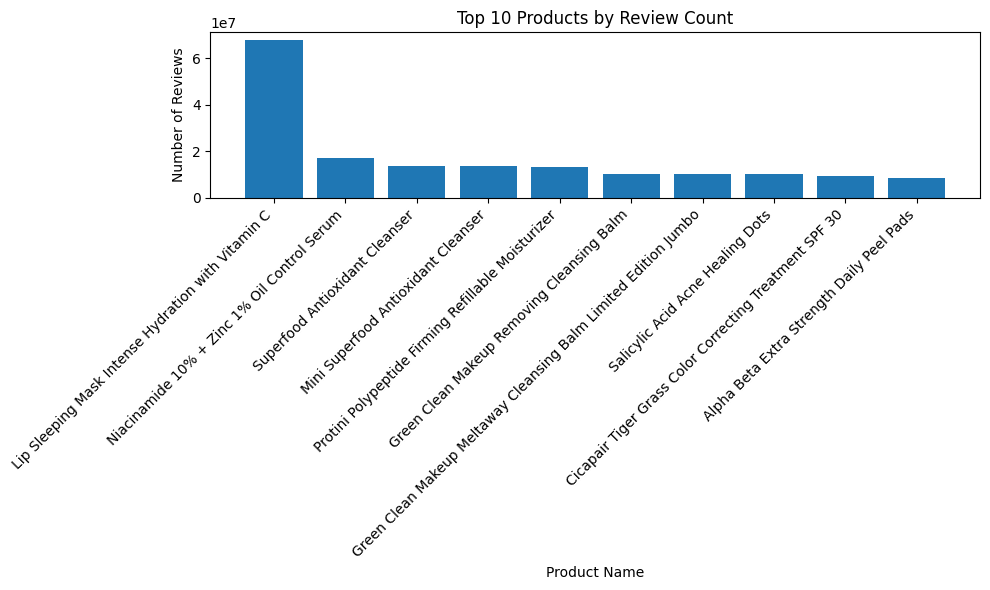

In [20]:
# Grouping and summing reviews, then sorting in descending order and selecting the top 10 products
top_products = result_df.groupby(['product_id', 'product_name'])['reviews'].sum().reset_index()
top_products = top_products.sort_values(by='reviews', ascending=False).head(10)

# Extracting product names and review counts
products = top_products['product_name']
review_counts = top_products['reviews']

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.bar(products, review_counts)
plt.xlabel("Product Name")
plt.ylabel("Number of Reviews")
plt.title("Top 10 Products by Review Count")
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better appearance
plt.show()


##### **Top 10 products based on rating**

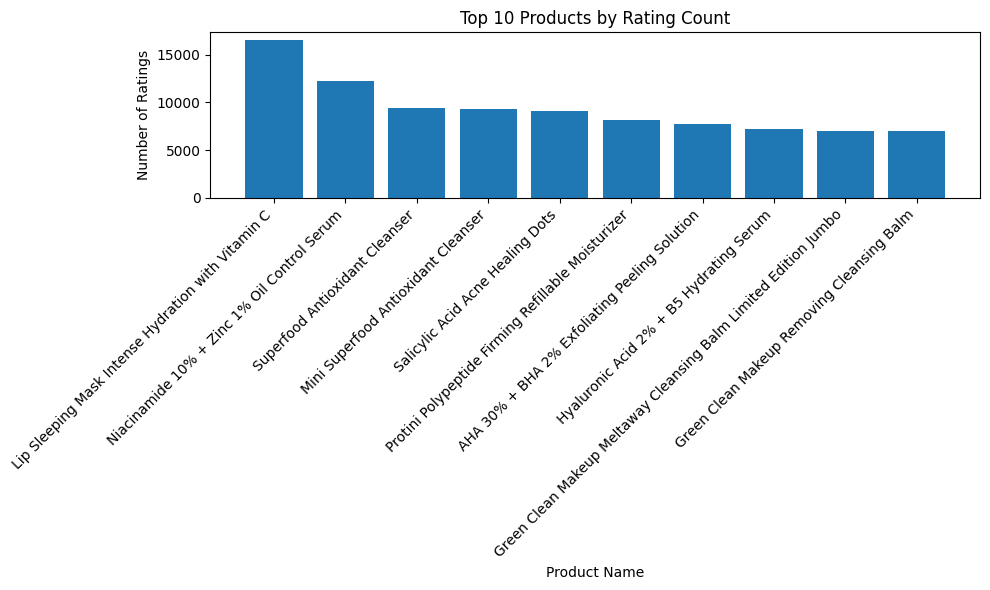

In [21]:
# Grouping and summing ratings, then sorting in descending order and selecting the top 10 products
top_products = result_df.groupby(['product_id', 'product_name'])['rating'].sum().reset_index()
top_products = top_products.sort_values(by='rating', ascending=False).head(10)

# Extracting product names and rating counts
products = top_products['product_name']
rating_counts = top_products['rating']

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.bar(products, rating_counts)
plt.xlabel("Product Name")
plt.ylabel("Number of Ratings")
plt.title("Top 10 Products by Rating Count")
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better appearance
plt.show()


In [22]:
# Splitting the ingredients column by comma and exploding into multiple rows
exploded_df = result_df.assign(ingredients=result_df['ingredients'].str.split(',')).explode('ingredients')

# Calculating the count of each ingredient
ingredient_counts = exploded_df['ingredients'].value_counts().reset_index()
ingredient_counts.columns = ['ingredients', 'count']


##### **Top 10 ingredients**

In [23]:

# Sorting ingredient_counts by count in descending order and selecting the top 10
top_10 = ingredient_counts.sort_values(by='count', ascending=False).head(10)

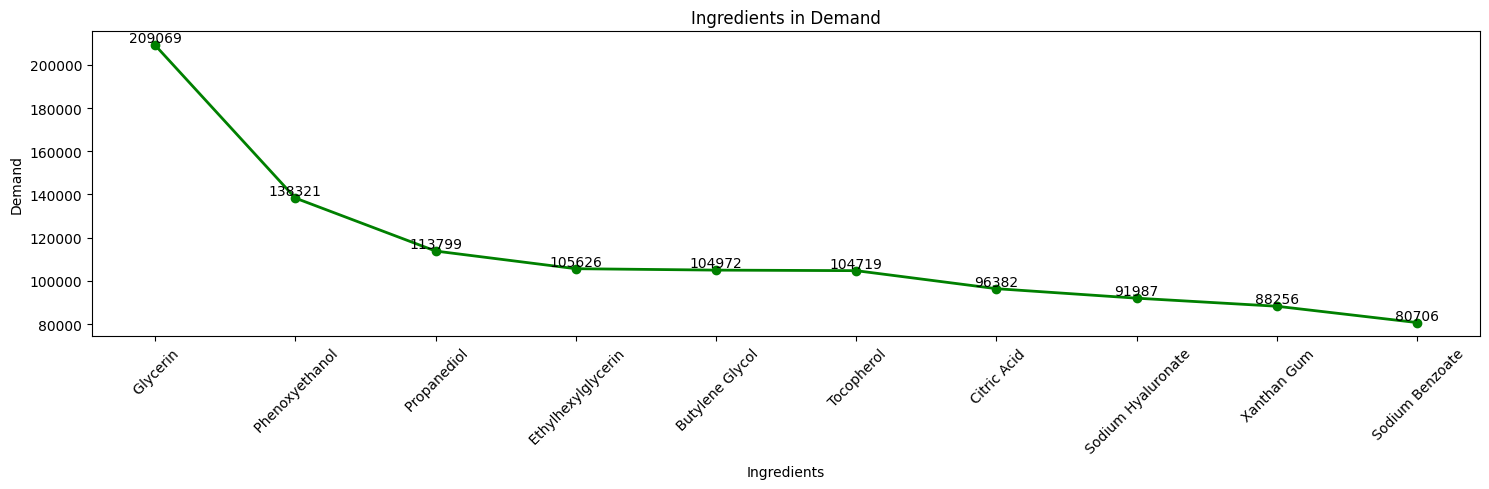

In [24]:

# Plotting the line chart
fig, ax = plt.subplots(figsize=(15, 5))

# Plotting the line with markers for each data point
ax.plot(top_10['ingredients'], top_10['count'], marker='o', markersize=6, color='green', linewidth=2)

# Adding labels to the data points
for i, count in enumerate(top_10['count']):
    ax.text(i, count, str(count), ha='center', va='bottom')  # Adding count labels to each point

# Setting labels, title, and rotating x-axis labels for better readability
plt.xlabel('Ingredients')
plt.ylabel('Demand')
plt.title('Ingredients in Demand')
plt.xticks(rotation=45)  # Rotate x-axis labels

plt.tight_layout()  # Adjust layout for better appearance
plt.show()


####**Least 10 Ingredients**

In [25]:
# Sorting ingredient_counts by count in ascending order and selecting the least 10
least_10 = ingredient_counts.sort_values(by='count', ascending=True).head(10)

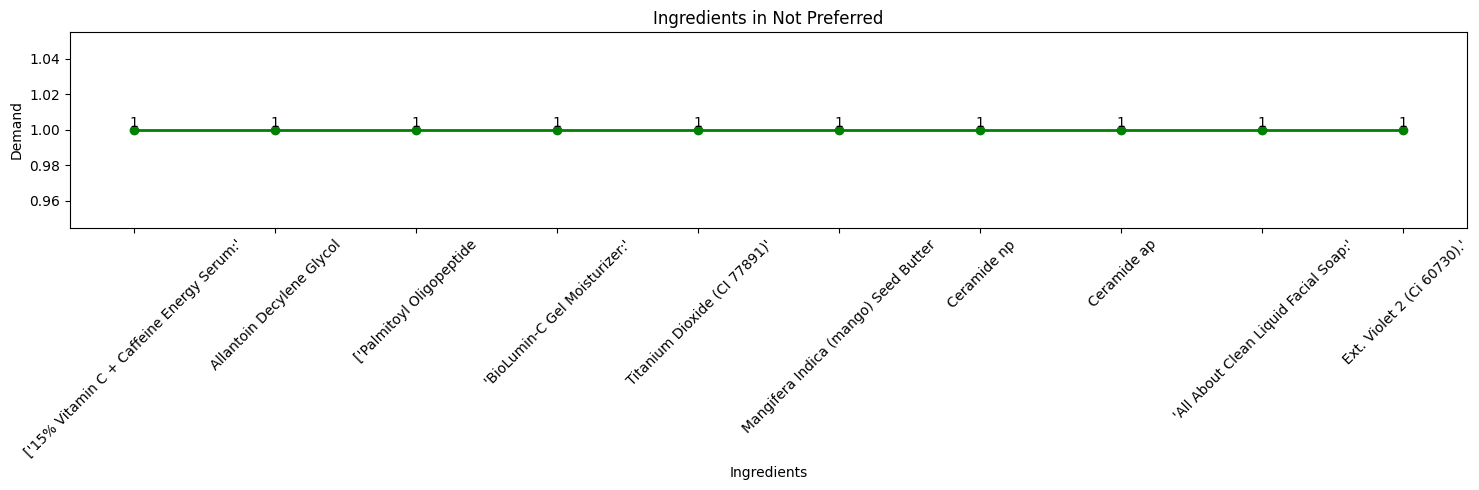

In [26]:

# Plotting the line chart for the least frequent ingredients
fig, ax = plt.subplots(figsize=(15, 5))

# Plotting the line with markers for each data point
ax.plot(least_10['ingredients'], least_10['count'], marker='o', markersize=6, color='green', linewidth=2)

# Adding labels to the data points
for i, count in enumerate(least_10['count']):
    ax.text(i, count, str(count), ha='center', va='bottom')  # Adding count labels to each point

# Setting labels, title, and rotating x-axis labels for better readability
plt.xlabel('Ingredients')
plt.ylabel('Demand')
plt.title('Ingredients in Not Preferred')
plt.xticks(rotation=45)  # Rotate x-axis labels

plt.tight_layout()  # Adjust layout for better appearance
plt.show()


#### **Average rating per brand**

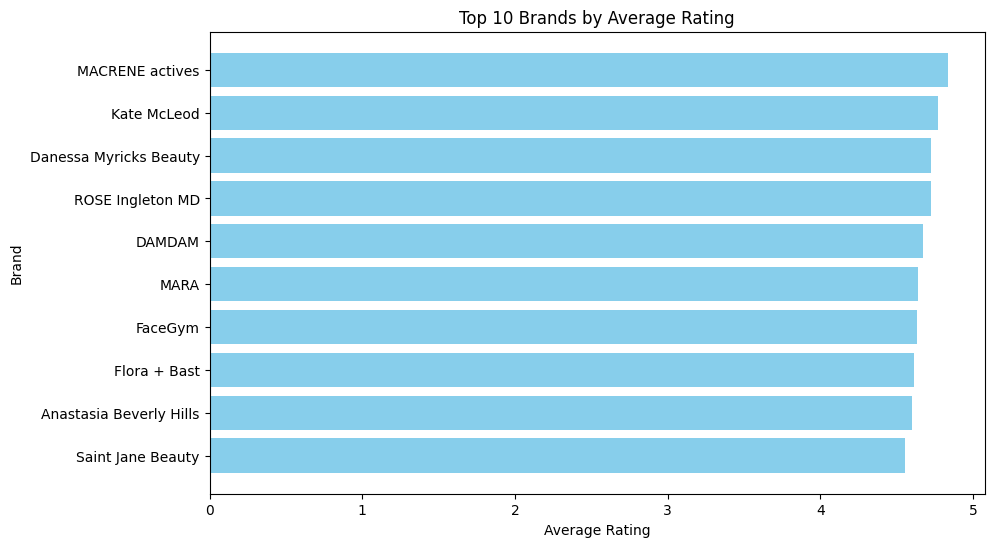

In [27]:
# Drop rows with missing values in the 'brand_name' column
df_cleaned = result_df.dropna(subset=['brand_name'])

# Group by brand_name and calculate the average rating
brand_ratings = df_cleaned.groupby('brand_name')['rating'].mean().reset_index()

# Sort by average rating in descending order and select top 10 brands
brand_ratings = brand_ratings.sort_values('rating', ascending=False).head(10)

# Plotting a horizontal bar chart for brand ratings
plt.figure(figsize=(10, 6))
plt.barh(brand_ratings['brand_name'], brand_ratings['rating'], color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Brand')
plt.title('Top 10 Brands by Average Rating')
plt.gca().invert_yaxis()  # Invert y-axis to display highest rating at the top
plt.show()



### **Total feedback count throughout the year**

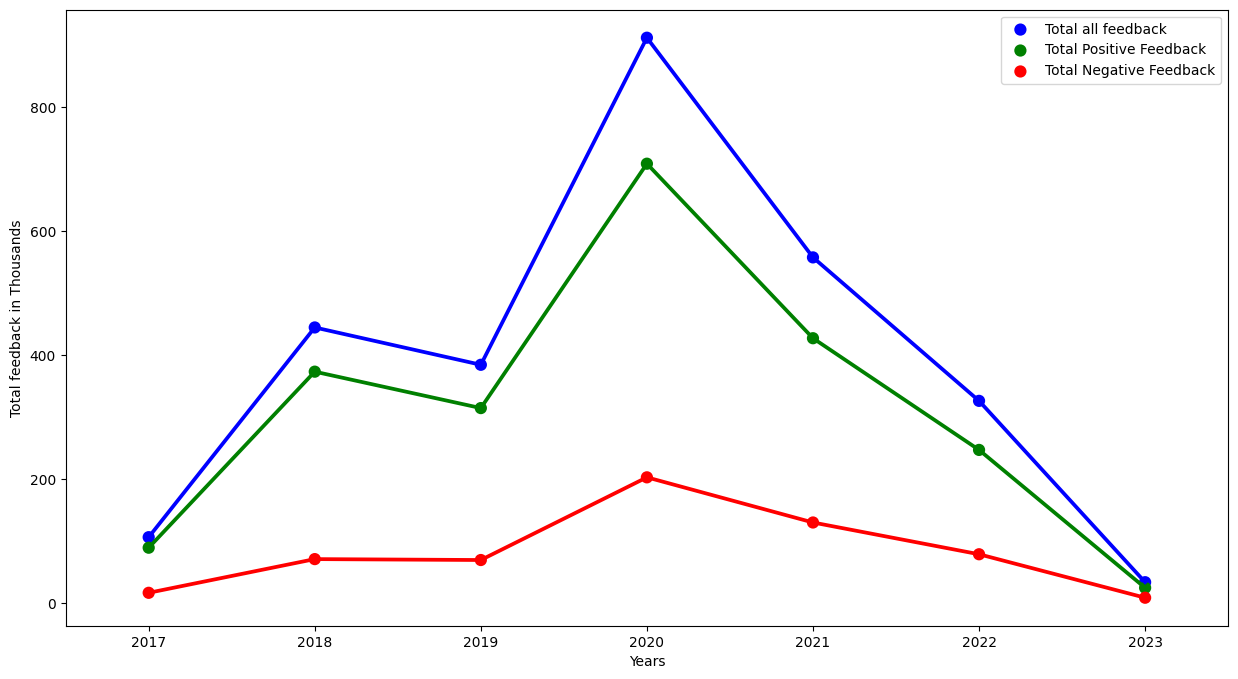

In [28]:
# Calculate the sums of feedback counts by year
total_feedback_count = result_df.groupby('year')['total_feedback_count'].sum().reset_index()
total_pos_feedback_count = result_df.groupby('year')['total_pos_feedback_count'].sum().reset_index()
total_neg_feedback_count = result_df.groupby('year')['total_neg_feedback_count'].sum().reset_index()

# Plotting using Matplotlib and Seaborn
fig, ax1 = plt.subplots(figsize=(15, 8))

sns.pointplot(data=total_feedback_count, x='year', y='total_feedback_count', color="blue", label="Total all feedback", ax=ax1)
sns.pointplot(data=total_pos_feedback_count, x='year', y='total_pos_feedback_count', color="green", label="Total Positive Feedback", ax=ax1)
sns.pointplot(data=total_neg_feedback_count, x='year', y='total_neg_feedback_count', color="red", label="Total Negative Feedback", ax=ax1)

ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}".format(x / 1000)))  # Convert y-axis values to thousands
ax1.set_ylabel("Total feedback in Thousands")
ax1.set_xlabel("Years")
ax1.legend()

plt.show()


**Highest no of feedbacks are passed on the year 2020 and least on year 2023.**

#### **Reviews by sentiment on secondary category**

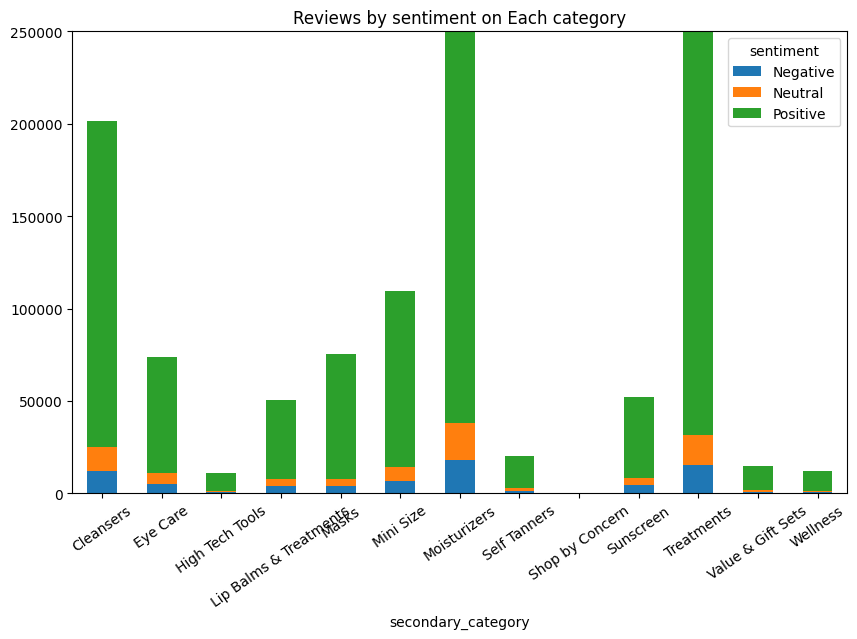

In [29]:
# Aggregate the data for duplicate 'secondary_category' entries
aggregated_df = result_df.groupby(['secondary_category', 'sentiment'])['rating'].sum().unstack(fill_value=0)

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_ylim(0, 250000)
ax.set_title("Reviews by sentiment on Each category")
colors = sns.color_palette('Paired')
aggregated_df.plot(kind='bar', stacked=True, ax=ax)
ax.set_xticklabels(aggregated_df.index, rotation=35)

plt.show()

###**Rating volume by customers**

In [30]:
# Group by 'author_id' and count the occurrences
rating_vol = result_df.groupby('author_id').size().reset_index(name='count')

# Sort by count in descending order
rating_vol = rating_vol.sort_values(by='count', ascending=False)

# Display the result
rating_vol

,author_id,count
106233,24998050674,78
80263,1930716686,76
108452,25452917574,56
100072,23668221929,51
179373,9075527849,48
...,...,...
69830,1527654977,1
69834,1527673671,1
69836,1527674966,1
69837,1527675852,1


##**Sentiment trend in year 2020**

From above we got to know year 2020 was the top year for review so we are taking year 2020 to analyze sentiment trend.

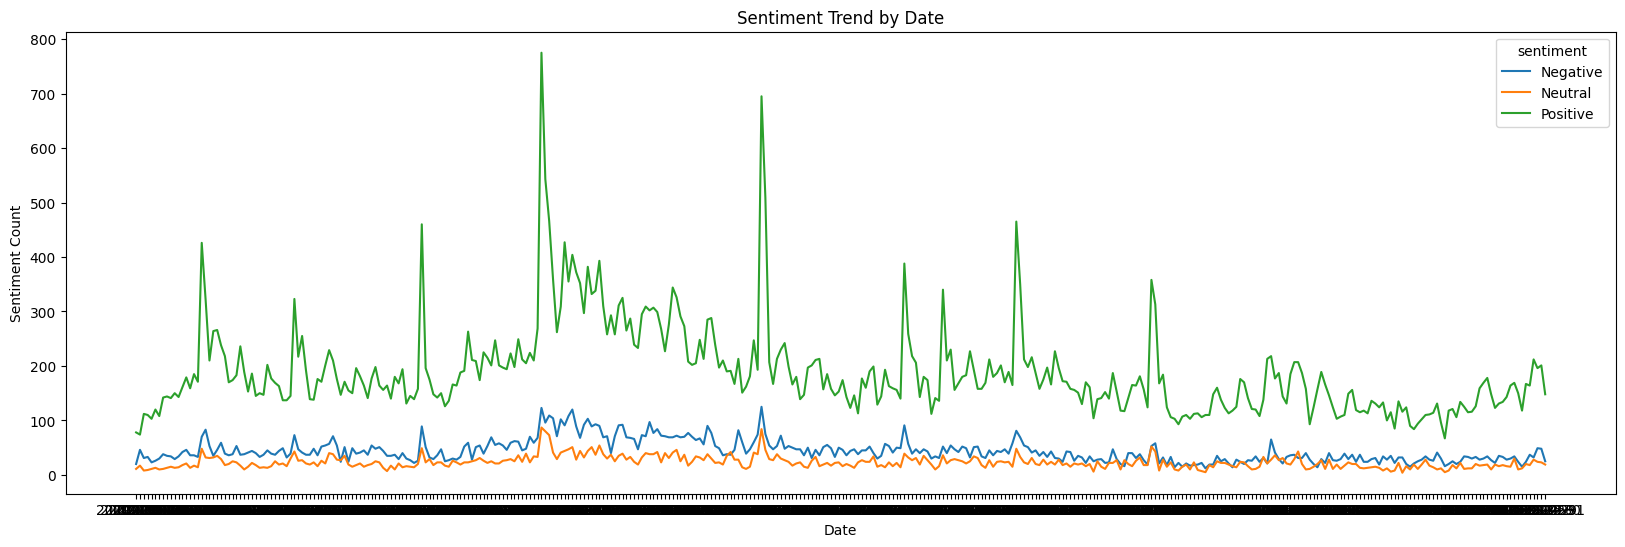

In [31]:
# Convert 'submission_time' to a string type
result_df['submission_time'] = result_df['submission_time'].astype(str)

# Filter the DataFrame to select reviews in the year 2020
review_df = result_df[result_df['submission_time'].str.startswith('2020')]

# Group by 'submission_time' and 'sentiment' and count the occurrences
sentiment_trend_df = review_df.groupby(['submission_time', 'sentiment']).size().reset_index(name='sentiment_count')

# Create the line plot using Seaborn
fig, ax = plt.subplots(figsize=(20, 6))
sns.lineplot(x="submission_time", y="sentiment_count", hue="sentiment", data=sentiment_trend_df)
ax.set_xlabel("Date")
ax.set_ylabel("Sentiment Count")
ax.set_title("Sentiment Trend by Date")
plt.show()


In year 2020 April had the highest positive sentiment collected whereas dec had the least. For neutral and negative they seem to be linear.

### **Analysing customer characterstics**

In [32]:
# Grouping customer_id and sentiment
grouped_customer = result_df.groupby(['author_id', 'sentiment'])

# Categorizing users based on their reviewing frequency
reviews_per_user = grouped_customer.size().reset_index(name='count')
reviews_per_user = reviews_per_user.sort_values(by='count', ascending=False)

regular_users = reviews_per_user[reviews_per_user['count'] > 50]['author_id'].unique()
medium_users = reviews_per_user[(reviews_per_user['count'] <= 50) & (reviews_per_user['count'] > 20)]['author_id'].unique()
# Convert regular_users to a DataFrame or Series
regular_users_df = pd.DataFrame({'author_id': regular_users})
medium_users_df = pd.DataFrame({'author_id': medium_users})

In [33]:
# Define the function to visualize user behavior
def visualize_user_behavior(input_df, title, size):
    # Pivoting the sentiment column to create separate columns for each sentiment
    pivoted_df = input_df.pivot_table(index='author_id', columns='sentiment', values='count', fill_value=0)
    pivoted_df = pivoted_df.reset_index()

    # Create a stacked bar plot of the counts
    fig, ax = plt.subplots(figsize=size)
    colors = sns.color_palette('Dark2')
    pivoted_df.plot(kind='bar', stacked=True, x='author_id', color=colors, ax=ax)
    ax.set_title(title)
    ax.set_xticklabels(pivoted_df['author_id'], rotation=35)
    plt.show()

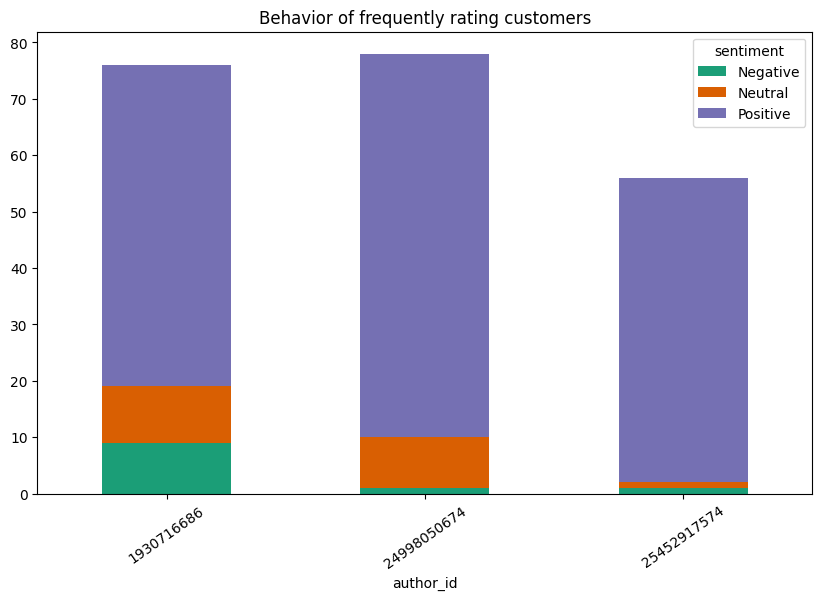

In [34]:
# Join the DataFrames
regular_user_behaviour = pd.merge(reviews_per_user, regular_users_df, on='author_id', how='inner')
visualize_user_behavior(regular_user_behaviour, title="Behavior of frequently rating customers", size=(10, 6))

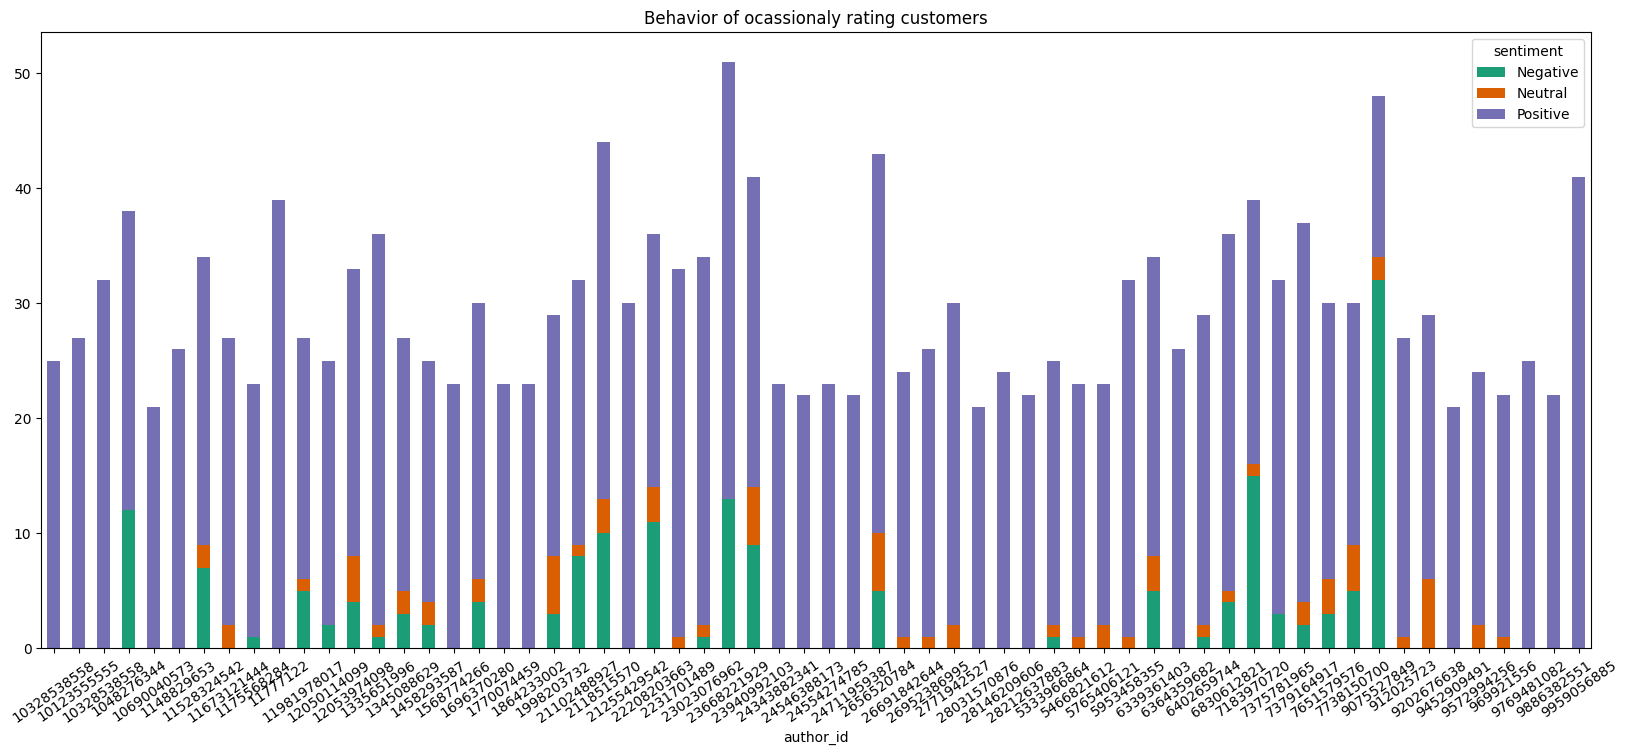

In [35]:
# Join the DataFrames
medium_user_behaviour = pd.merge(reviews_per_user, medium_users_df, on='author_id', how='inner')
visualize_user_behavior(medium_user_behaviour, title="Behavior of ocassionaly rating customers", size=(20, 8))


Frequently visiting customer are happy with the products so most of the times they leave positive reviews but occasionaly visiting customer have fluctuations.


#### **Highly bought products**

In [36]:

# Calculate the number of ratings per user
ratings_per_user = result_df.groupby('author_id').size().reset_index(name='count')

# Filter for users with more than 30 ratings
frequent_users = ratings_per_user[ratings_per_user['count'] > 30]

# Join frequent users with the original DataFrame
frequent_ratings = pd.merge(frequent_users, result_df, on='author_id', how='inner')

# Group by product_id to get the count of ratings for each product by frequent customers
frequent_products = frequent_ratings.groupby(['product_name', 'primary_category'])['count'].sum().reset_index()
frequent_products = frequent_products.rename(columns={'count': 'total_feedback_count'})

# Filter for products with more than 30 total feedback counts
frequent_products = frequent_products[frequent_products['total_feedback_count'] > 30]

# Sort the results by total feedback count in descending order and limit to the top 10 products
frequent_products = frequent_products.sort_values(by='total_feedback_count', ascending=False).head(10)

frequent_products


,product_name,primary_category,total_feedback_count
395,Mini Watermelon Glow PHA + BHA Pore-Tight Toner,Skincare,449
632,Watermelon Glow PHA + BHA Pore-Tight Toner,Skincare,449
162,Creamy Eye Treatment with Avocado,Skincare,375
261,Good Genes All-In-One AHA Lactic Acid Treatment,Skincare,343
476,Retinol Eye Stick,Skincare,306
308,Jet Lag Mask,Skincare,304
369,Mini Jet Lag Mask,Skincare,304
393,Mini Unseen Sunscreen SPF 40 PA+++,Skincare,297
598,Unseen Sunscreen SPF 40 PA+++,Skincare,297
60,B-Hydra Intensive Hydration Serum with Hyaluro...,Skincare,286



#### **Taking only top product for further analysis**

In [37]:

# Filter for the specific product name
df_top_1 = result_df[result_df['product_name'] == "Midnight Recovery Concentrate Moisturizing Face Oil"]

# Group by product_name and rating to get counts
product_ratings = df_top_1.groupby(['product_name', 'rating']).size().reset_index(name='count')

# Group by product_name to get the total count
product_totals = product_ratings.groupby('product_name').size().reset_index(name='total')

# Join the two DataFrames
product_percentages = pd.merge(product_ratings, product_totals, on='product_name')

# Calculate the percentage and round it to two decimal places
product_percentages['percentage'] = (product_percentages['count'] / product_percentages['total'] * 100).round(2)

# Select the desired columns
product_percentages = product_percentages[['product_name', 'rating', 'percentage']]

product_percentages


,product_name,rating,percentage
0,Midnight Recovery Concentrate Moisturizing Fac...,1,2520.0
1,Midnight Recovery Concentrate Moisturizing Fac...,2,1000.0
2,Midnight Recovery Concentrate Moisturizing Fac...,3,1240.0
3,Midnight Recovery Concentrate Moisturizing Fac...,4,1720.0
4,Midnight Recovery Concentrate Moisturizing Fac...,5,10120.0


#### **Analyzing sentiment scores over time for that top 1 product**

In [38]:
from textblob import TextBlob
# Define a function to calculate sentiment scores
def get_sentiment_score(review_text):
    return TextBlob(str(review_text)).sentiment.polarity

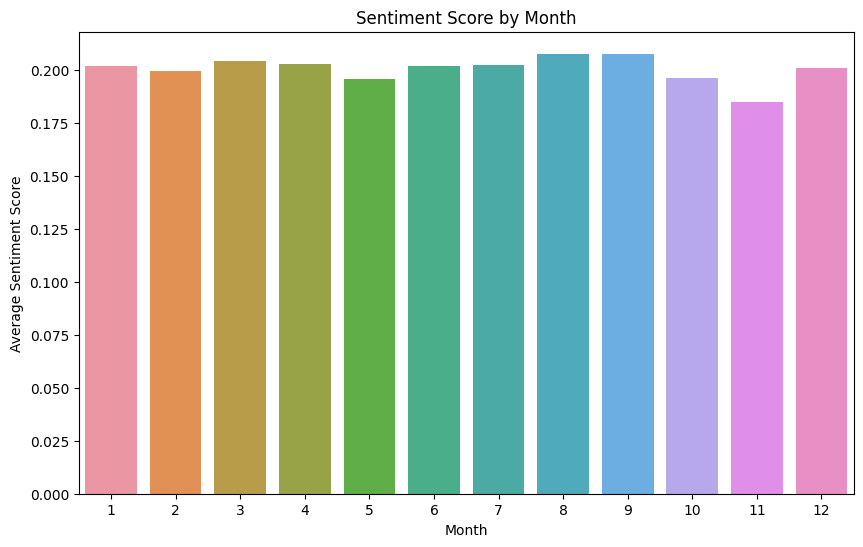

In [39]:
# Apply the sentiment analysis function to the review_text column
result_df['sentiment_score'] = result_df['review_text'].apply(get_sentiment_score)

# Extract the review month from the submission_time column
result_df['review_month'] = pd.to_datetime(result_df['submission_time']).dt.month

# Group by month and calculate the average sentiment score
monthly_sentiment_df = result_df.groupby('review_month')['sentiment_score'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='review_month', y='sentiment_score', data=monthly_sentiment_df)
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Score by Month')
plt.show()


For the product "Midnight Recovery Concentrate Moisturizing Face Oil" most of the review were done in November and September and least on May.


#### **Sentiment Analysis on review text**

In [40]:
#Let's define a function to preprocess text
def clean_text(text):
    stop = stopwords.words('english')
    punc = list(punctuation)
    bad_tokens = stop + punc
    lemma = WordNetLemmatizer()
    tokens = word_tokenize(text)
    word_tokens = [t for t in tokens if t.isalpha()]
    clean_token = [lemma.lemmatize(t.lower()) for t in word_tokens if t not in bad_tokens]
    return " ".join(clean_token)

In [41]:
result_df['text'] = result_df['review_text'].apply(clean_text)

#### **WordCloud**

In [42]:
allwords = ' '.join(word for word in result_df['text'])

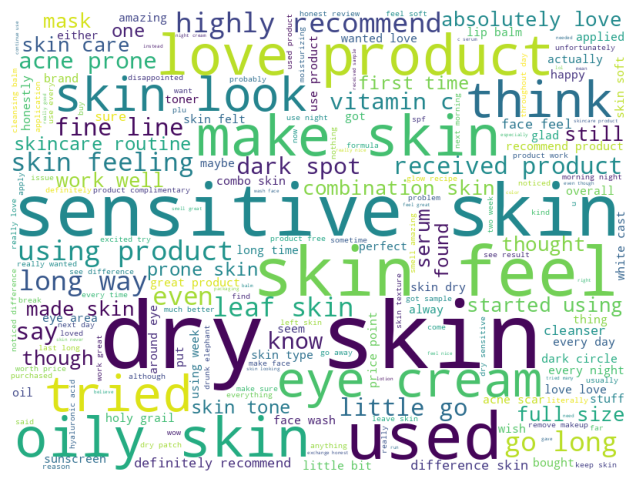

In [43]:
wordcloud = WordCloud(
    width = 800,
    height = 600,
    background_color = 'white').generate(allwords)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from textblob import TextBlob

# Tokenize the 'review_text' column
result_df['tokens'] = result_df['review_text'].apply(lambda x: x.split())

# Remove stopwords from the 'tokens' column
result_df['filtered_tokens'] = result_df['tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in ENGLISH_STOP_WORDS])

# Count vectorization to convert text into numerical features
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(result_df['filtered_tokens'].apply(lambda tokens: ' '.join(tokens)))

# Load the pre-trained sentiment analysis model and apply it
result_df['sentiments'] = result_df['review_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Select the necessary columns for analysis
df_sentiment_analysis = result_df[['review_text', 'sentiments', 'filtered_tokens']]


In [45]:
df_sentiment_analysis

,review_text,sentiments,filtered_tokens
0,"Ever since I bought this, I noticed that my sk...",0.377333,"[bought, this,, noticed, skin, softer, wake, l..."
1,I’ve been using this for 2 months now and I ca...,0.192130,"[I’ve, using, 2, months, can’t, tell, amazing,..."
2,"Great product. It is so moisturizing. However,...",0.099621,"[Great, product., moisturizing., However,, hug..."
3,I’m addicted! I’m on my 3rd jar and it’s becom...,-0.100000,"[I’m, addicted!, I’m, 3rd, jar, it’s, staple, ..."
4,After I apply my serum I use this moisturizer ...,0.168750,"[apply, serum, use, moisturizer, it’s, perfect..."
...,...,...,...
294717,The consistency is more of a lotion which I re...,0.227778,"[consistency, lotion, really, like., Easy, app..."
294718,Purchased this when it was on sale for $255. G...,0.425000,"[Purchased, sale, $255., Great, value., I’ve, ..."
294719,everything works sooo well and the merch is ni...,0.450000,"[works, sooo, merch, nice, -, worth, price]"
294720,I really like the cleanser and the moisturizer...,0.066667,"[really, like, cleanser, moisturizer,, acne, p..."


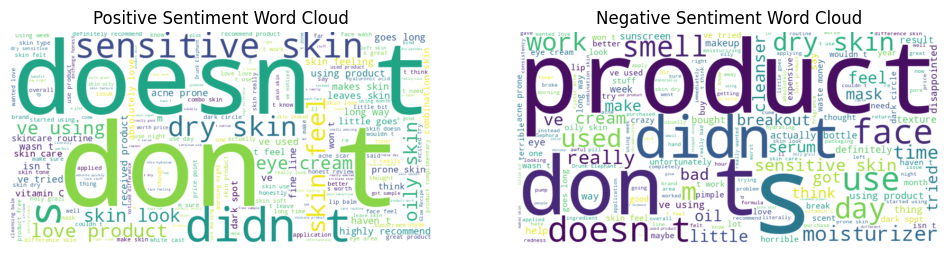

In [46]:

# Filter positive and negative reviews
positive_reviews = df_sentiment_analysis[df_sentiment_analysis['sentiments'] > 0]
negative_reviews = df_sentiment_analysis[df_sentiment_analysis['sentiments'] < 0]

# Combine filtered tokens from positive and negative reviews
positive_tokens = [token for tokens in positive_reviews['filtered_tokens'] for token in tokens]
negative_tokens = [token for tokens in negative_reviews['filtered_tokens'] for token in tokens]

# Create word clouds for positive and negative sentiments
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_tokens))
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_tokens))

# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.show()


### **Recommendation System**


#### Page rank algorithm : using graph-based algorithms for generating recommendations for new customers.

This approach involves developing a graph of items (products) and users, where the edges between nodes represent user-item interactions. By analyzing the graph structure, algorithm can identify clusters of similar items and users, and make recommendations based on these clusters.

In [47]:
import networkx as nx
import pandas as pd

def create_product_review_graph(review_product_features_df):
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes (products) with attributes
    for _, row in review_product_features_df.iterrows():
        G.add_node(
            row['product_id'],
            average_rating=row['average_rating'],
            number_of_reviews=row['number_of_reviews']
        )

    # Add edges (reviews) between authors and products
    for _, row in review_product_features_df.iterrows():
        G.add_edge(row['author_id'], row['product_id'])

    return G

In [48]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def cluster_products_by_pagerank_and_features(product_features_df):
    # Create a feature matrix
    feature_matrix = product_features_df[['average_rating', 'number_of_reviews', 'pagerank']]

    # Standardize the features
    scaler = StandardScaler()
    feature_matrix = scaler.fit_transform(feature_matrix)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=3, random_state=1)
    cluster_assignments = kmeans.fit_predict(feature_matrix)

    # Add the cluster assignments to the original DataFrame
    product_features_df['cluster'] = cluster_assignments

    return product_features_df



###### **Input to Page rank**

In [49]:
def cluster_products_by_pagerank_and_features(product_features_df, review_product_features_df):
    """
    Clusters products based on their PageRank scores and features.
    Returns a DataFrame containing the product ID, cluster assignment, and PageRank score.
    """
    # Create a directed graph using the provided function
    G = create_product_review_graph(review_product_features_df)

    # Calculate PageRank scores
    pagerank_scores = nx.pagerank(G)

    # Create DataFrame from pagerank_scores
    pagerank_df = pd.DataFrame(list(pagerank_scores.items()), columns=['product_id', 'pagerank'])

    # Merge pagerank_df with product_features_df
    product_clusters_df = pd.merge(product_features_df, pagerank_df, on='product_id', how='inner')

    # Feature scaling
    features = product_clusters_df[['average_rating', 'number_of_reviews', 'pagerank']]
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # KMeans clustering
    kmeans = KMeans(n_clusters=3, random_state=1)
    product_clusters_df['cluster'] = kmeans.fit_predict(features_scaled)

    return product_clusters_df


In [50]:

# Constraint: Limiting the DataFrame
df_reviews_final_limited = result_df

# Create a DataFrame with review and product IDs
review_product_df = df_reviews_final_limited[['author_id', 'product_id']].drop_duplicates()

# Create a DataFrame with product features (e.g., rating, number of reviews, etc.)
product_features_df = df_reviews_final_limited.groupby('product_id').agg(
    average_rating=('rating', 'mean'),
    number_of_reviews=('rating', 'count')
).reset_index()

# Join the two DataFrames to get a DataFrame with review and product features
review_product_features_df = review_product_df.merge(
    product_features_df,
    on='product_id'
)

# Create a directed graph
G = nx.DiGraph()

# Add nodes (products) with attributes
for _, row in review_product_features_df.iterrows():
    G.add_node(
        row['product_id'],
        average_rating=row['average_rating'],
        number_of_reviews=row['number_of_reviews']
    )

# Add edges (reviews) between authors and products
for _, row in review_product_features_df.iterrows():
    G.add_edge(row['author_id'], row['product_id'])

# Calculate PageRank scores
pagerank_scores = nx.pagerank(G)

# Create DataFrame from pagerank_scores
pagerank_df = pd.DataFrame(list(pagerank_scores.items()), columns=['product_id', 'pagerank'])

# Merge pagerank_df with product_features_df
product_clusters_df = product_features_df.merge(pagerank_df, on='product_id', how='inner')

# Feature scaling
features = product_clusters_df[['average_rating', 'number_of_reviews', 'pagerank']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=1)
cluster_assignments = kmeans.fit_predict(features_scaled)

# Add cluster assignments to the original DataFrame
product_clusters_df['cluster'] = cluster_assignments

# Calculate Silhouette score
silhouette = silhouette_score(features_scaled, cluster_assignments)

# Select the relevant columns
results = product_clusters_df[['product_id', 'cluster','pagerank']]

# Print the Silhouette score
print("Silhouette with squared euclidean distance =", silhouette)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette with squared euclidean distance = 0.4207930063768626


Silhouette score ranges from -1 to 1, where a score of -1 indicates incorrect clustering, 0 indicates overlapping clusters and 1 indicates highly dense and well-separated clusters. Generally, a silhouette score of 0.42 or above is considered good for most practical purposes.

#### **Products for Recommendations on Home page of new customers**

In [52]:
# Get the distinct results
results = results.drop_duplicates()

# Sort the nodes by 'pagerank' in descending order
sorted_nodes = results.sort_values(by='pagerank', ascending=False)

# Select the top 10 nodes
top_k_nodes = sorted_nodes.head(10)['product_id']

# Filter the original DataFrame based on 'product_parent' and select 'product_title'
filtered_df = result_df[result_df['product_id'].isin(top_k_nodes)][['product_name']]

# Get distinct product titles
filtered_df = filtered_df.drop_duplicates()

# Display the filtered DataFrame
filtered_df


,product_name
49272,Protini Polypeptide Firming Refillable Moistur...
114252,Self Tanning Bronzing Face Drops
140673,Lip Sleeping Mask Intense Hydration with Vitam...
171313,Salicylic Acid Acne Healing Dots
211893,Good Genes All-In-One AHA Lactic Acid Treatment
232974,The Dewy Skin Cream Plumping & Hydrating Moist...
257113,Niacinamide 10% + Zinc 1% Oil Control Serum
260053,Hyaluronic Acid 2% + B5 Hydrating Serum
261810,AHA 30% + BHA 2% Exfoliating Peeling Solution
263528,Glycolic Acid 7% Exfoliating Toning Solution


#### **NLP technique**

Natural Language Processing (NLP) techniques can be used to analyze user reviews to extract insights about user preferences and behavior. This data is then used to train machine learning model for personalized recommendations.

In [53]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_products_using_nlp(user_reviews, tfidf, tfidf_matrix, result_df, num_recommendations=5):
    # Compute TF-IDF matrix for the user's review text
    user_tfidf_matrix = tfidf.transform([user_reviews])

    # Compute cosine similarity between the user's review and all reviews in the dataset
    user_cosine_sim = cosine_similarity(user_tfidf_matrix, tfidf_matrix)[0]

    # Sorting reviews by cosine similarity score in descending order
    review_indices = list(enumerate(user_cosine_sim))
    review_indices_sorted = sorted(review_indices, key=lambda x: x[1], reverse=True)

    # Get the indices of the top N most similar reviews
    top_review_indices = [i[0] for i in review_indices_sorted[:num_recommendations]]

    # Get the product IDs for the top N reviews
    top_product_ids = result_df.iloc[top_review_indices]['product_id'].tolist()

    # Get the product names for the top N reviews
    top_product_names = result_df.iloc[top_review_indices]['product_name'].tolist()

    # Return the top N product IDs and names as recommendations
    return {'product_ids': top_product_ids, 'product_names': top_product_names}



In [54]:
# Performing text preprocessing on the 'review_body' column
result_df['review_text'] = result_df['review_text'].str.lower()  # convert to lowercase
result_df['review_text'] = result_df['review_text'].str.split().apply(lambda x: ' '.join(x))  # remove extra whitespaces


###### **Training TfidfVectorizer to perform collabrative filtering.**

Collaborative Filtering: It is a method of making automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users (collaborating). Using user-based collaborative filtering i.e., the rating of an item for a user based on the ratings of similar users,

In [55]:
# Create a TF-IDF matrix for the review text
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(result_df['review_text'])

#### **Generating recommendations based on review's**

In [57]:
# Example usage: recommend products based on user's reviews
user_reviews = "Great product. it is so moisturizing."

print("User review:", user_reviews)
recommendations = recommend_products_using_nlp(user_reviews, tfidf, tfidf_matrix,result_df)
print("\nRecommended products:")
for i, product in enumerate(recommendations['product_names']):
    print(f"{i+1}. {product}")

User review: Great product. it is so moisturizing.

Recommended products:
1. Watermelon Pink Juice Oil-Free Moisturizer
2. SHIKULIME Mega Hydrating Moisturizer
3. Watermelon Pink Juice Oil-Free Moisturizer
4. F-Balm Electrolyte Waterfacial Mask
5. F-Balm Electrolyte Waterfacial Mask


In [58]:
# Example usage2: recommend products based on user's reviews
user_reviews = "I really like the cleanser and the moisturizer.It makes my skin really soft"

print("user review:", user_reviews)
recommendations = recommend_products_using_nlp(user_reviews,tfidf,tfidf_matrix,result_df)
print("\nRecommended products:")
for i, product in enumerate(recommendations['product_names']):
    print(f"{i+1}. {product}")

user review: I really like the cleanser and the moisturizer.It makes my skin really soft

Recommended products:
1. SUPERMASK - The Charcoal Mask
2. The Cream Cleansing Gel with TFC8 Gentle Cleanser
3. A-Gloei Retinol Oil
4. Hello FAB Coconut Water Cream
5. The Rice Wash Skin-Softening Cleanser
